#Úvod
Hlavním tématem je spojování tabulek pomocí různých typů JOIN a kartézského součinu. 

Následovat budou množinové operace jako sjednocení, rozdíl nebo průnik.

#Spojování tabulek pomocí JOIN

##Proč spojovat tabulky

V relační databázi jsou data distribuována ve více logických tabulkách. 

Chceme z databáze dostat odpovědi na komplexní otázky.

Můžeme data dávat do společného kontextu.

Oddělená data opět spojujeme dohromady, ale jenom pro daný moment – nevytváříme redundanci (zbytečné opakování).


##Typy spojení




Máme více typů spojení v kontextu prázdných hodnot (NULL).

###Kartézský součin (každý s každým)


###(INNER) JOIN
Vrátí záznamy, které mají shodné hodnoty v obou tabulkách.

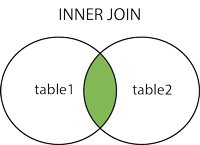

###LEFT (OUTER) JOIN
Vrátí všechny záznamy z levé tabulky a odpovídající záznamy z pravé tabulky.

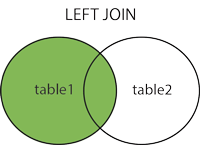

###RIGHT (OUTER) JOIN
Vrátí všechny záznamy z pravé tabulky a odpovídající záznamy z levé tabulky.

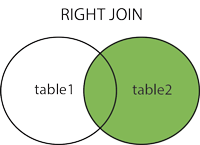

###FULL (OUTER) JOIN
Vrátí všechny záznamy, pokud existuje shoda v levé nebo pravé tabulce.

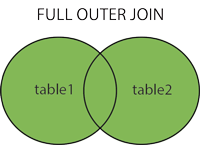

##Úkol 1
Spojte tabulky `czechia_price` a `czechia_price_category`. 

Vypište všechny dostupné sloupce.


In [ ]:

SELECT *
FROM czechia_price
INNER JOIN czechia_price_category
    ON czechia_price.category_code = czechia_price_category.code;
    

##Úkol 2
Předchozí příklad upravte tak, že vhodně přejmenujete tabulky a vypíšete ID a jméno kategorie potravin a cenu.



In [ ]:

SELECT
    cp.id, cpc.name, cp.value
FROM czechia_price AS cp
JOIN czechia_price_category AS cpc
    ON cp.category_code = cpc.code;
    

##Úkol 3
Přidejte k tabulce cen potravin i informaci o krajích ČR a vypište informace o cenách společně s názvem kraje.



In [ ]:

SELECT
    cp.*, cr.name
FROM czechia_price AS cp
LEFT JOIN czechia_region AS cr
    ON cp.region_code = cr.code;


Rozdíl v počtech řádků levého a vnitřního spojení:

In [ ]:

SELECT COUNT(1) total_number_of_rows
FROM czechia_price cp
LEFT JOIN czechia_region cr
    ON cp.region_code = cr.code;


In [ ]:

SELECT COUNT(1) total_number_of_rows
FROM czechia_price cp
JOIN czechia_region cr
    ON cp.region_code = cr.code;
    

##Úkol 4

Využijte v příkladě z předchozího úkolu RIGHT JOIN s výměnou pořadí tabulek. 

Jak se změní výsledky?

In [ ]:
SELECT
    cp.*, cr.name
FROM czechia_region AS cr
RIGHT JOIN czechia_price AS cp
    ON cp.region_code = cr.code;


Výsledný výpis se nějak nezmění. Dotazy jsou ekvivalentní.

##Úkol 5
K tabulce `czechia_payroll` připojte všechny okolní tabulky. Využijte ERD model ke zjištění, které to jsou.



In [ ]:

SELECT *
FROM czechia_payroll cp
JOIN czechia_payroll_calculation cpc
    ON cp.calculation_code = cpc.code
JOIN czechia_payroll_industry_branch cpib
    ON cp.industry_branch_code = cpib.code
JOIN czechia_payroll_unit cpu
    ON cp.unit_code = cpu.code
JOIN czechia_payroll_value_type cpvt
    ON cp.value_type_code = cpvt.code;
    

##Úkol 6
Přepište dotaz z předchozí lekce do varianty, ve které použijete JOIN,

In [ ]:
SELECT
    *
FROM czechia_payroll_industry_branch
WHERE code IN (
    SELECT
        industry_branch_code
    FROM czechia_payroll
    WHERE value IN (
        SELECT
            MAX(value)
        FROM czechia_payroll
        WHERE value_type_code = 5958
    )
);


In [ ]:
SELECT 
    TOP 1 cpib.*
FROM czechia_payroll_industry_branch cpib
JOIN czechia_payroll cp
    ON cpib.code = cp.industry_branch_code
WHERE cp.value_type_code = 5958
ORDER BY cp.value DESC;

##Úkol 7

Spojte informace z tabulek cen a mezd (pouze informace o průměrných mzdách). 

Vypište z každé z nich základní informace, celé názvy odvětví a kategorií potravin a datumy měření, které vhodně naformátujete.

In [ ]:

SELECT
    cpc.name AS food_category, cp.value AS price,
    cpib.name AS industry, cpay.value AS average_wages,
    cp.date_from,
    cp.date_to,
    FORMAT(cp.date_from, 'dddd, MMMM, yyyy','es-es') AS price_measured_from,
    FORMAT(cp.date_from, 'dddd, MMMM, yyyy','cs-cz') AS price_measured_from_cze,
    FORMAT(cp.date_to, 'd.MM.yy') AS price_measured_to,
    cpay.payroll_year
FROM czechia_price AS cp
JOIN czechia_payroll AS cpay
    ON YEAR(cp.date_from) = cpay.payroll_year AND
    cpay.value_type_code = 5958 AND
    cp.region_code IS NULL
JOIN czechia_price_category cpc
    ON cp.category_code = cpc.code
JOIN czechia_payroll_industry_branch cpib
    ON cpay.industry_branch_code = cpib.code;



##Úkol 8

K tabulce `healthcare_provider` připojte informace o regionech a vypište celé názvy krajů i okresů pro místa výkonu i sídla.

In [ ]:

SELECT
    hp.name,
    cr.name AS region_name,
    cr2.name AS residence_region_name,
    cd.name AS district_name,
    cd2.name AS residence_district_name
FROM healthcare_provider hp
LEFT JOIN czechia_region cr
    ON hp.region_code = cr.code
LEFT JOIN czechia_region cr2
    ON hp.residence_region_code = cr2.code
LEFT JOIN czechia_district cd
    ON hp.district_code = cd.code
LEFT JOIN czechia_district cd2
    ON hp.residence_district_code = cd2.code;


Poskytovatelé zdravotních služeb bez uvedeného okresu místa poskytování:

In [ ]:

SELECT *
FROM healthcare_provider
WHERE district_code IS NULL;


##Úkol 9

Upravte předchozí dotaz tak, aby byli na výpisu pouze takoví poskytovatelé, kteří mají sídlo v jiném kraji i jiném okrese než místo poskytování služeb.

In [ ]:

SELECT
    hp.name,
    cr.name AS region_name,
    cr2.name AS residence_region_name,
    cd.name AS district_name,
    cd2.name AS residence_district_name
FROM healthcare_provider hp
LEFT JOIN czechia_region cr
    ON hp.region_code = cr.code
LEFT JOIN czechia_region cr2
    ON hp.residence_region_code = cr2.code
LEFT JOIN czechia_district cd
    ON hp.district_code = cd.code
LEFT JOIN czechia_district cd2
    ON hp.residence_district_code = cd2.code
WHERE
    hp.region_code != hp.residence_region_code AND
    hp.district_code != hp.residence_district_code;
    

#Kartézský součin a CROSS JOIN

Podstatou kartézského součinu je vzít každý záznam z tabulky A a prokřížit ho s každým záznamem z tabulky B. 

Z každého takového prokřížení se nám potom stane výsledek operace.

##Úkol 1
Spojte tabulky `czechia_price` a `czechia_price_category` pomocí kartézského součinu.

Každý záznam s každým:



In [ ]:
SELECT *
FROM czechia_price, czechia_price_category;


Nutno omezit na smysluplné kombinace:



In [ ]:
SELECT *
FROM czechia_price cp, czechia_price_category cpc
WHERE cp.category_code = cpc.code;

##Úkol 2
Převeďte předchozí příklad do syntaxe s CROSS JOIN.



In [ ]:

SELECT *
FROM czechia_price cp
CROSS JOIN czechia_price_category cpc
WHERE cp.category_code = cpc.code;


##Úkol 3

Vytvořte všechny kombinace krajů kromě těch případů, kdy by se v obou sloupcích kraje shodovaly.


In [ ]:

SELECT
    cr.name first_region,
    cr2.name second_region
FROM czechia_region cr
CROSS JOIN czechia_region cr2
WHERE cr.code != cr2.code;


#Množinové operace

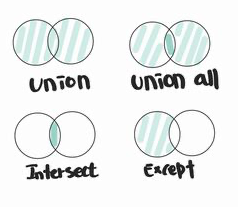

##Typy spojení


###Sjednocení - UNION

Výsledek obou operací bude sjednocen.

Je důležité mít stejně pojmenované sloupce ve stejném pořadí.


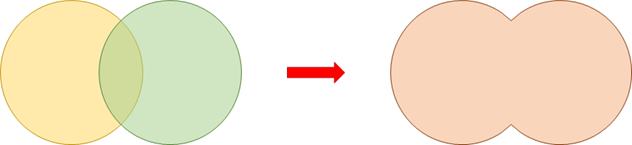

###Sjednocení - UNION ALL

Výsledek obou operací bude sjednocen.

Je důležité mít stejně pojmenované sloupce ve stejném pořadí.


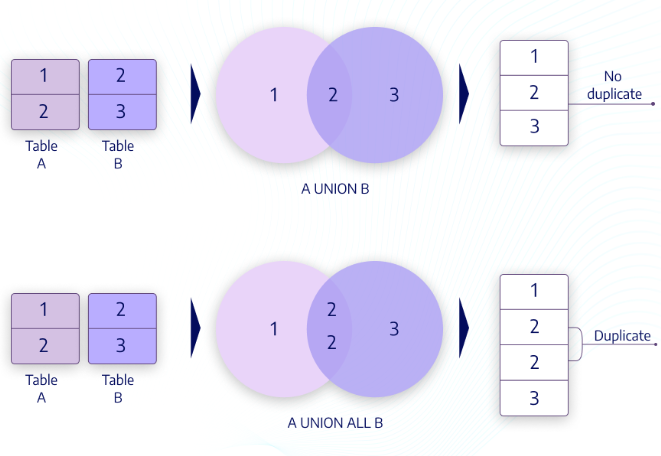

###Průnik - INTERSECT

Výsledek bude průnikem obou množin.

Je důležité mít stejně pojmenované sloupce ve stejném pořadí.


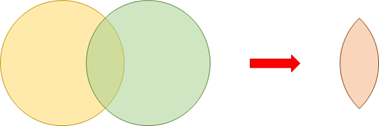

### Rozdíl - EXCEPT

Výsledek jsou unikátní záznamy, které jsou v první a ne ve druhé.

Není komutativní, podobně jako odečítání.


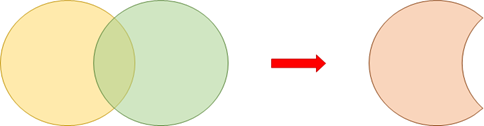

##Úkol 1
Přepište následující dotaz na variantu spojení dvou separátních dotazů se selekcí pro každý kraj zvlášť.



In [ ]:

SELECT category_code, value
FROM czechia_price
WHERE region_code IN ('CZ064', 'CZ010');


In [ ]:

SELECT category_code, value
FROM czechia_price
WHERE region_code = 'CZ064'
UNION ALL
SELECT category_code, value
FROM czechia_price
WHERE region_code = 'CZ010';


##Úkol 2
Upravte předchozí dotaz tak, aby byly odstraněny duplicitní záznamy.


In [ ]:

SELECT category_code, value
FROM czechia_price
WHERE region_code = 'CZ064'
UNION
SELECT category_code, value
FROM czechia_price
WHERE region_code = 'CZ010';


##Úkol 3

Sjednoťe kraje a okresy do jedné množiny. 

Tu následně seřaďte dle kódu vzestupně.

In [ ]:

SELECT *
FROM
    (SELECT code, name, 'region' AS country_part
    FROM czechia_region
    UNION
    SELECT code, name, 'district' AS country_part
    FROM czechia_district) AS country_parts
ORDER BY code;


##Úkol 4

Vytvořte průnik cen z krajů Hl. město Praha a Jihomoravský kraj.

In [ ]:

SELECT category_code, value
FROM czechia_price
WHERE region_code = 'CZ064'
INTERSECT
SELECT category_code, value
FROM czechia_price
WHERE region_code = 'CZ010';


##Úkol 5

Vypište kód a název odvětví, ID záznamu a hodnotu záznamu průměrných mezd a počtu zaměstnanců. 

Vyberte pouze takové záznamy, které se shodují v uvedené hodnotě a spadají do odvětví s označením A nebo B.

In [ ]:

SELECT cpib.*, cp.id, cp.value
FROM czechia_payroll cp
JOIN czechia_payroll_industry_branch cpib
    ON cp.industry_branch_code = cpib.code
WHERE value IN (
    SELECT value
    FROM czechia_payroll
    WHERE industry_branch_code = 'A'
    INTERSECT
    SELECT value
    FROM czechia_payroll
    WHERE industry_branch_code = 'B'
);


Vykonání dotazu se výrazně urychlí vytvořením vyhledávací struktury nad sloupcem value:



In [ ]:
CREATE INDEX czechia_payroll__value__index ON czechia_payroll(value);


Index lze následně smazat:



In [ ]:
DROP INDEX czechia_payroll__value__index ON czechia_payroll;

##Úkol 6

Vyberte z tabulky `czechia_price` takové záznamy, které jsou v Jihomoravském kraji jiné na sloupcích category_code a value než v Praze.

In [ ]:

SELECT category_code, value
FROM czechia_price
WHERE region_code = 'CZ064'
EXCEPT
SELECT category_code, value
FROM czechia_price
WHERE region_code = 'CZ010';


##Úkol 7

Upravte předchozí dotaz tak, abychom získali záznamy, které jsou v Praze a ne v Jihomoravském kraji. 

Dále udělejte průnik těchto dvou disjunktních podmnožin.

Úprava předchozího dotazu:


In [ ]:

SELECT category_code, value
FROM czechia_price
WHERE region_code = 'CZ010'
EXCEPT
SELECT category_code, value
FROM czechia_price
WHERE region_code = 'CZ064';


Průnik dvou opačných podmnožin:



In [ ]:
(SELECT category_code, value
FROM czechia_price
WHERE region_code = 'CZ064'
EXCEPT
SELECT category_code, value
FROM czechia_price
WHERE region_code = 'CZ010')
INTERSECT
(SELECT category_code, value
FROM czechia_price
WHERE region_code = 'CZ010'
EXCEPT
SELECT category_code, value
FROM czechia_price
WHERE region_code = 'CZ064');

# UPOZORNĚNÍ

---



Při práci v DBeaveru ukončujte průběžně connections do dtb, která nepotřebujete.

Před ukončením DBeaveru rovněž ukončete všechna connections.

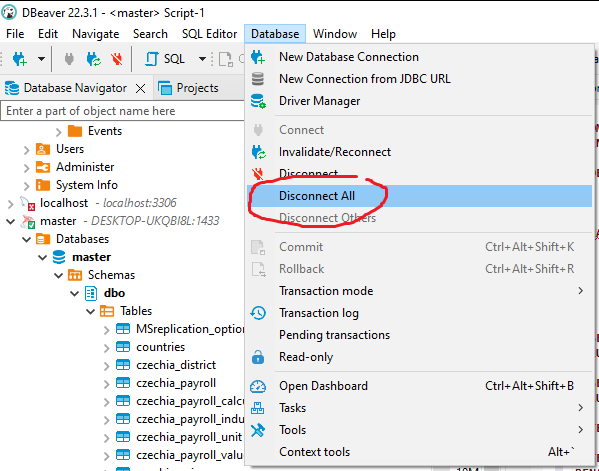

#Závěrem lekce

Spojování dat z více tabulek je velice důležitou operací. 

Díky této možnosti jsme schopni dostávat odpovědi na komplexní otázky a dávat jednotlivé informace do společného kontextu. 

Různé druhy JOIN nám umožní tvořit tato spojení efektivně. 

I operace nad množinami nám dovolí obdržet zajímavé výstupy.